In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import xgboost
print(xgboost.__version__)

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

1.6.1


In [2]:
key_char = pd.read_csv('key_characteristics.csv')
key_char.drop(key_char.columns[key_char.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
key_char.head()

URBRRL  RATCAT_A  INCGRP_A  FAMINCTC_A  RACEALLP_A  BMICAT_A  WEIGHTLBTC_A  \
0       4         9         3       60000           2         3           201   
1       4         9         3       50000           1         2           130   
2       4        12         3       65000           1         3           215   
3       4        14         5      120000           8         4           290   
4       1         4         1       30000           1         4           290   

   HEIGHTTC_A  PCNTTC  NOTCOV_A  ...  MARITAL_A  SMKEV_A  LASTDR_A  \
0          71       3         2  ...          1        2         1   
1          62       2         2  ...          1        1         1   
2          74       2         2  ...          1        2         1   
3          72       2         2  ...          1        2         1   
4          72       4         2  ...          1        1         1   

   PAYBLL12M_A  DIBEV_A  PREDIB_A  CANEV_A  ASEV_A  POVRATTC_A  DEPEV_A  
0            2        2         2        2       2        2.96        2  
1            2        2         2        2       2        2.97        2  
2            2        2         1        1       2        4.28        2  
3            2        2         2        2       2        7.13        2  
4            1        1         1        2       1        1.13        1  

[5 rows x 31 columns]

In [4]:
list(key_char)

['URBRRL',
 'RATCAT_A',
 'INCGRP_A',
 'FAMINCTC_A',
 'RACEALLP_A',
 'BMICAT_A',
 'WEIGHTLBTC_A',
 'HEIGHTTC_A',
 'PCNTTC',
 'NOTCOV_A',
 'EDUC_A',
 'PCNTFAM_A',
 'HISP_A',
 'REGION',
 'SEX_A',
 'AGEP_A',
 'HOUTENURE_A',
 'INCWRKO_A',
 'SCHCURENR_A',
 'NATUSBORN_A',
 'AFVET_A',
 'MARITAL_A',
 'SMKEV_A',
 'LASTDR_A',
 'PAYBLL12M_A',
 'DIBEV_A',
 'PREDIB_A',
 'CANEV_A',
 'ASEV_A',
 'POVRATTC_A',
 'DEPEV_A']

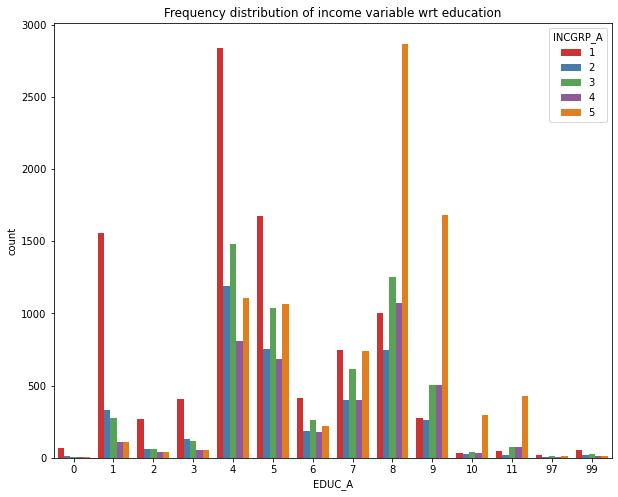

In [3]:
# f, ax = plt.subplots(figsize=(10, 8))
# ax = sns.countplot(x="EDUC_A", hue="INCGRP_A", data=key_char, palette="Set1")
# ax.set_title("Frequency distribution of income variable wrt education")
# plt.show()

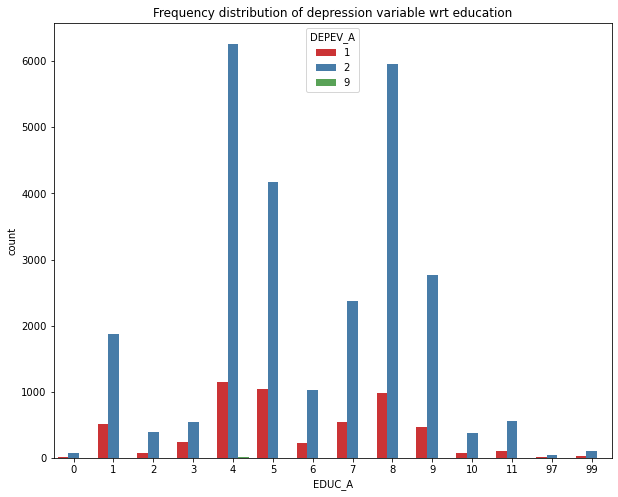

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="EDUC_A", hue="DEPEV_A", data=key_char, palette="Set1")
ax.set_title("Frequency distribution of depression variable wrt education")
plt.show()

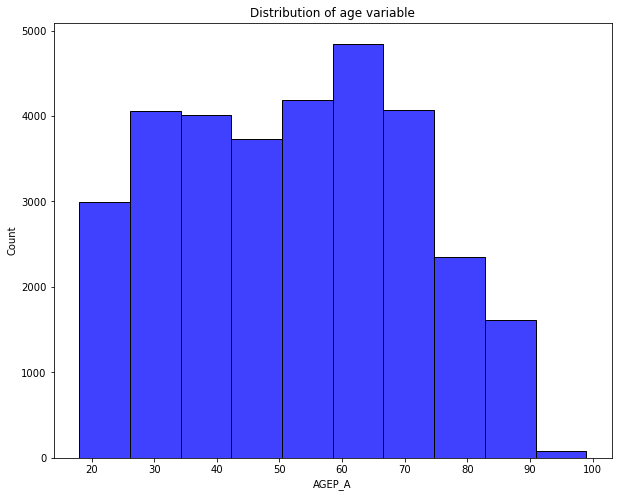

In [12]:
f, ax = plt.subplots(figsize=(10,8))
x = key_char['AGEP_A']
ax = sns.histplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

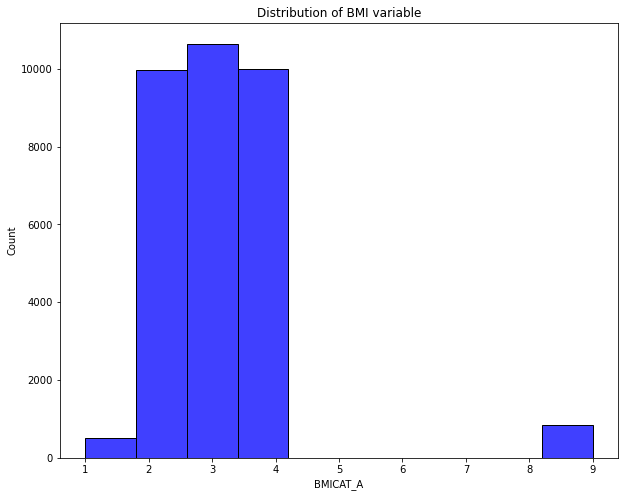

In [33]:
f, ax = plt.subplots(figsize=(10,8))
x = key_char['BMICAT_A']
ax = sns.histplot(x, bins=10, color='blue')
ax.set_title("Distribution of BMI variable")
plt.show()

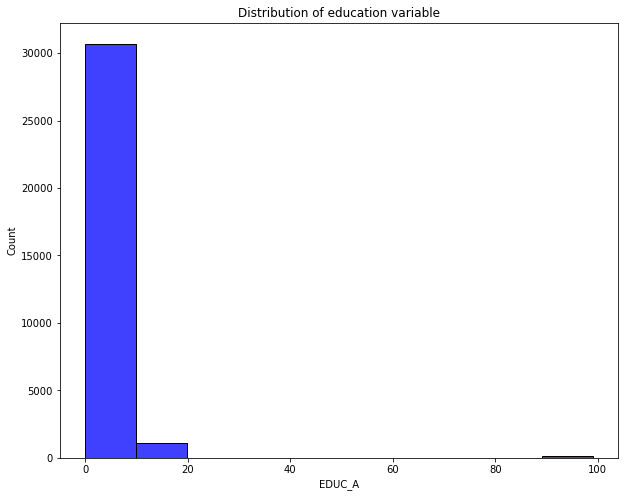

In [38]:
f, ax = plt.subplots(figsize=(10,8))
x = key_char['EDUC_A']
ax = sns.histplot(x, bins=10, color='blue')
ax.set_title("Distribution of education variable")
plt.show()

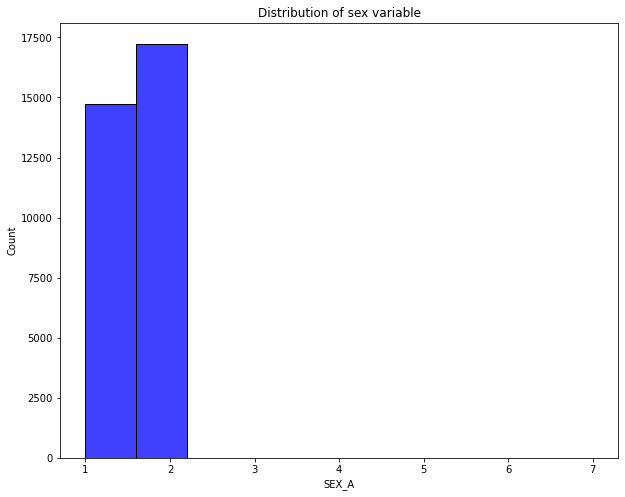

In [31]:
f, ax = plt.subplots(figsize=(10,8))
x = key_char['SEX_A']
ax = sns.histplot(x, bins=10, color='blue')
ax.set_title("Distribution of sex variable")
plt.show()

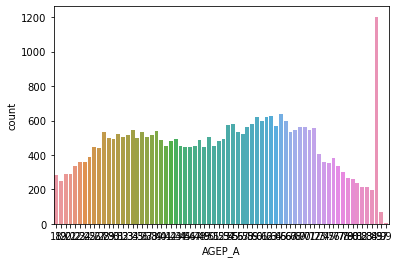

In [15]:
cp = sns.countplot(x="AGEP_A", data=key_char)

In [18]:
key_char.hist(bins=10, color='steelblue', edgecolor='black', linewidth=0.5,
          xlabelsize=1, ylabelsize=1, grid=True)
plt.tight_layout(rect=(0, 0, 100, 100))

XGBoost feature importance:

In [5]:
X = key_char.drop(['DEPEV_A'], axis=1)
y = key_char['DEPEV_A']

In [23]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [18]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [19]:
classifier.score(X_train, y_train)

0.9076218942648981

In [20]:
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 14.12%


In [21]:
classifier.score(X_test, y_test)

0.14117758604342467

In [22]:
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':classifier.feature_importances_})
feature_importances.sort_values('feature_importance',ascending=False)

features  feature_importance
14         SEX_A            0.109321
24   PAYBLL12M_A            0.090778
28        ASEV_A            0.070393
22       SMKEV_A            0.048637
19   NATUSBORN_A            0.044747
23      LASTDR_A            0.036890
4     RACEALLP_A            0.034706
12        HISP_A            0.033404
21     MARITAL_A            0.031570
3     FAMINCTC_A            0.030788
18   SCHCURENR_A            0.029188
20       AFVET_A            0.028099
17     INCWRKO_A            0.027793
15        AGEP_A            0.025515
16   HOUTENURE_A            0.024862
5       BMICAT_A            0.024045
26      PREDIB_A            0.023926
11     PCNTFAM_A            0.023769
27       CANEV_A            0.023630
29    POVRATTC_A            0.023583
8         PCNTTC            0.023380
25       DIBEV_A            0.022849
13        REGION            0.022807
6   WEIGHTLBTC_A            0.022557
10        EDUC_A            0.021893
2       INCGRP_A            0.021892
9       NOTCOV_A            0.021117
7     HEIGHTTC_A            0.020845
0         URBRRL            0.020263
1       RATCAT_A            0.016751

In [23]:
print(classifier.feature_importances_)

[0.02026255 0.01675083 0.02189154 0.03078824 0.0347061  0.02404506
 0.0225569  0.02084527 0.02337986 0.02111661 0.02189338 0.02376905
 0.03340447 0.02280748 0.10932074 0.02551462 0.02486239 0.02779296
 0.02918765 0.04474708 0.02809931 0.03157025 0.04863736 0.03689045
 0.09077834 0.02284905 0.02392606 0.02363036 0.07039345 0.02358264]


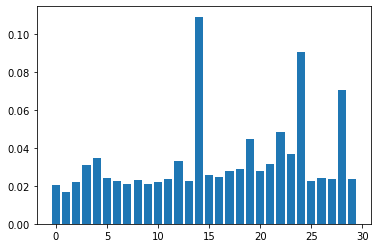

In [24]:
plt.bar(range(len(classifier.feature_importances_)), classifier.feature_importances_)
plt.show()

Catboost feature importance:

In [6]:
X = X.astype(int)

In [7]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [10]:
clf = CatBoostClassifier(
    iterations=50,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
)

Learning rate set to 0.361805
0:	learn: 0.7527729	test: 0.7541824	best: 0.7541824 (0)	total: 62.5ms	remaining: 3.06s
1:	learn: 0.6192196	test: 0.6213037	best: 0.6213037 (1)	total: 118ms	remaining: 2.83s
2:	learn: 0.5528377	test: 0.5555656	best: 0.5555656 (2)	total: 134ms	remaining: 2.1s
3:	learn: 0.5058685	test: 0.5107037	best: 0.5107037 (3)	total: 179ms	remaining: 2.06s
4:	learn: 0.4741152	test: 0.4797906	best: 0.4797906 (4)	total: 228ms	remaining: 2.05s
5:	learn: 0.4526879	test: 0.4598332	best: 0.4598332 (5)	total: 278ms	remaining: 2.04s
6:	learn: 0.4405666	test: 0.4480395	best: 0.4480395 (6)	total: 308ms	remaining: 1.89s
7:	learn: 0.4310891	test: 0.4396066	best: 0.4396066 (7)	total: 354ms	remaining: 1.86s
8:	learn: 0.4244465	test: 0.4342394	best: 0.4342394 (8)	total: 408ms	remaining: 1.86s
9:	learn: 0.4189022	test: 0.4302564	best: 0.4302564 (9)	total: 490ms	remaining: 1.96s
10:	learn: 0.4143747	test: 0.4264343	best: 0.4264343 (10)	total: 546ms	remaining: 1.93s
11:	learn: 0.4115392	t

In [11]:
clf.score(X_train, y_train)

0.8390503383267494

In [12]:
clf.score(X_test, y_test)

0.8308823529411765

In [13]:
y_predict= clf.predict(X_test)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on train data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on train data
RMSE: 0.47
R2: -0.12
Adjusted R2: -0.12


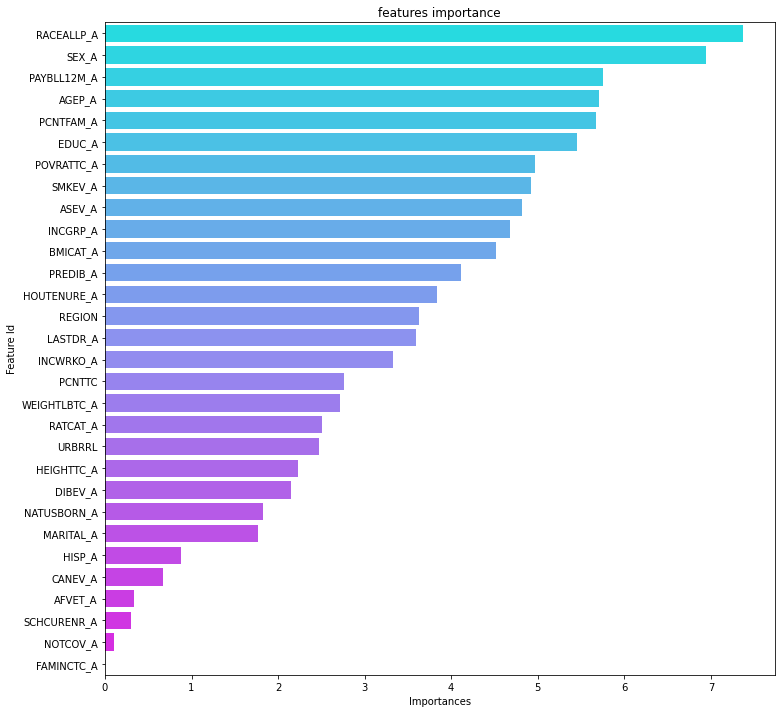

In [18]:
df_feature_importance = pd.DataFrame(clf.get_feature_importance(prettified=True))

plt.figure(figsize=(12, 12));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

Random forest feature importance: https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [25]:
# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

In [26]:

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.8320


In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

AGEP_A          0.102121
WEIGHTLBTC_A    0.094589
POVRATTC_A      0.094584
FAMINCTC_A      0.088145
HEIGHTTC_A      0.073260
EDUC_A          0.060967
REGION          0.042252
URBRRL          0.041056
RATCAT_A        0.038600
BMICAT_A        0.031088
PCNTTC          0.027178
PCNTFAM_A       0.025231
RACEALLP_A      0.022119
HOUTENURE_A     0.021657
SMKEV_A         0.021007
PAYBLL12M_A     0.020597
ASEV_A          0.020471
MARITAL_A       0.019522
INCGRP_A        0.019076
SEX_A           0.017624
INCWRKO_A       0.015598
PREDIB_A        0.015008
CANEV_A         0.014376
LASTDR_A        0.014103
DIBEV_A         0.012749
NATUSBORN_A     0.010997
AFVET_A         0.010158
HISP_A          0.009050
NOTCOV_A        0.008584
SCHCURENR_A     0.008233
dtype: float64

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

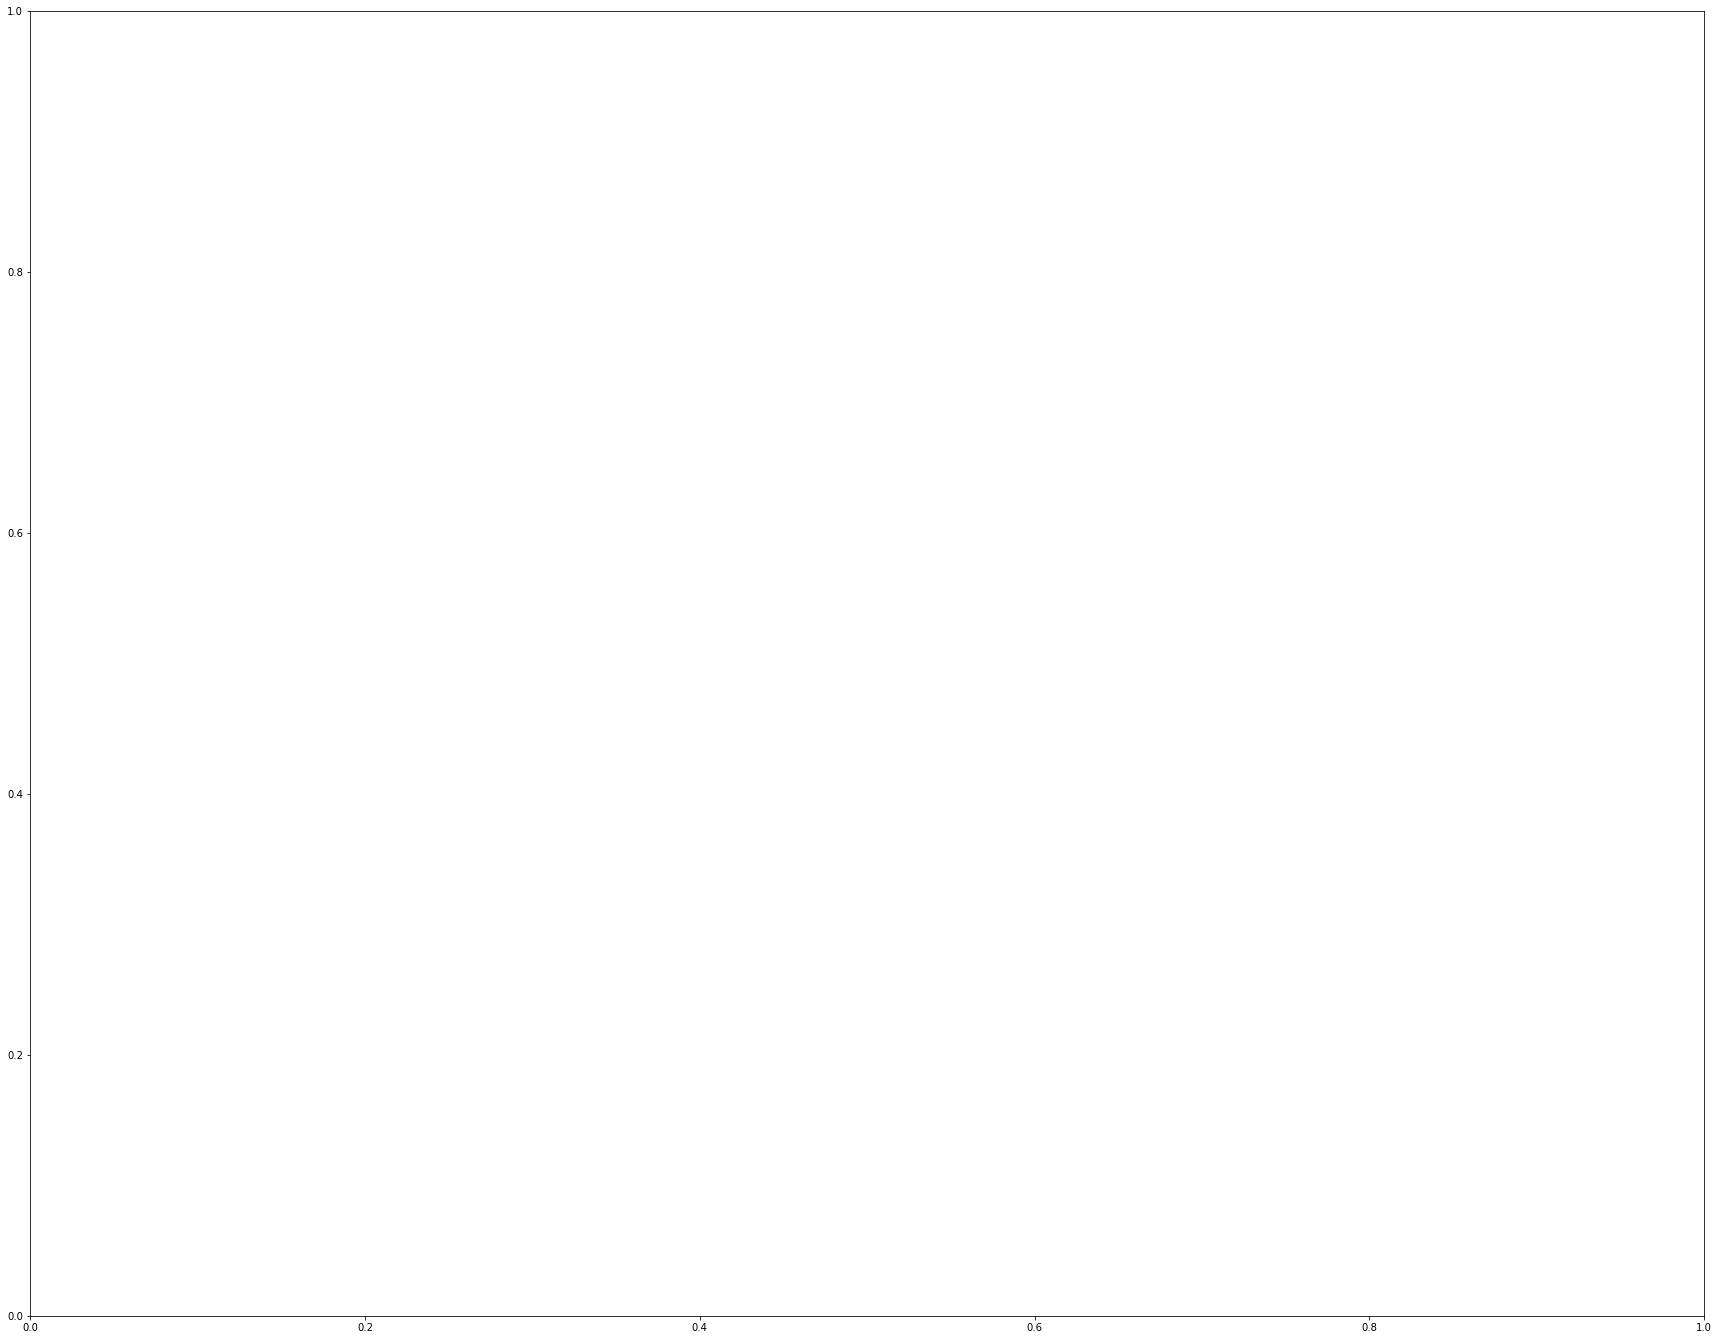

In [30]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=key_char)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()